# <center>Analysis of Hate Crimes In United States</center>
<center>By: Olivia Xia and Divya Koganti</center>

## Introduction
Hate crimes have sadly been a part of United States history from the beginning and continue to be a prevalent topic in our news today. The term "hate crime" became more commonly used during the 1980s, however the these acts began as far as the 16th century when Native Americans became targets of bias-motivated intimidation and violence from the Europeons who tried to colonize them. Fast forward to the present day, and hate crimes are still occurring all over the US. Due to the COVID-19 pandemic, a new wave of hate crimes against people of Asian origin has risen based on the accusation of spreading the virus. 

But what exactly is considered a hate crime? A hate crime is a prejudice-motivated crime that occurs when the offender(s) targets a victim because of their membership (or perceived membership) in a certain social group or racial demographic. Examples of these groups include ethnicity, disability, religion, gender identity, and sexual orientation.

Our tutorial will go through the entire data science pipeline through anlyzing hate crime in the United States. The data science pipeline is data collection, data processing, exploratory & data visualization, analysis & hypothesis testing & ML, and insight & policy decision. We have decided to focus on the bias groups targeted by these crimes to see which groups are more affected than others, and explore potential factors that may contribute to these hate crimes.
### Importance
As a country that is built upon values of freedom and equality, hate crimes directly go against what we stand for. There have been interventions in the past through legislation to mitigate these acts using hate crime laws. These laws are intended to deter bias-motivated violence by enhancing penalties associated with a conduct that is already deemed criminal under other laws. By analyzing the hate crime data, we can help determine trends in hate crimes, provide lawmakers with justification for policies, and show the issues in our communities in relation to hate crimes. 



## Data Collection
During this stage, we will be looking for data that fits our topic. Having accurate and reliable data that is legitimate is very importanct because our conclusions or analysis will be derived from the data we extract. We got our data from the FBI database of hate crime data, which was gotten through the [Uniform Crime Reporting](https://www.fbi.gov/services/cjis/ucr) (UCR) program that generates reliable statistics for law enforcement. The UCR program gets data from every law enforcement agencies in the country. Downloaded the hate crimes data from [FBI Crime Data Explorer](https://crime-data-explorer.app.cloud.gov/pages/downloads). The data contains every incident of hate crimes recorded since 1991. Make sure that the downloaded file (labeled "hate_crime.csv") is in your project directory.

#### Imports

During this project, we will be using Python language, and we use tools such as iPython and Jupyter Notebook to develop this project.

Just like any other Python project, we need to import some libraries. Here are some of the libraries we will be using throughout this tutorial.

In [1]:
#data structures
import pandas as pd

#data vizualization
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly

#math
import numpy as np

#Machine learning algorithms and more
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy import stats
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

One of the main libraries that we will be using throughout this project is Pandas. Pandas is an open-source data analysis tool that was built on top of the Python programming language and it is going to help us manipulate the data in an easy and flexible way. With the vast library of tools available, you can transform data very easily as you will see below.

Another library that helps maximize efficiency is NumPy. This library allows for easy computation for large datasets and it is another way to store and manipulate information.

Next, we will take the data from the csv file and create a pandas dataframe with the values. 

In [2]:
# reading from file
hate_crimes = pd.read_csv("hate_crime.csv")
hate_crimes.head(5)

INCIDENT_ID  DATA_YEAR        ORI PUB_AGENCY_NAME PUB_AGENCY_UNIT  \
0         3015       1991  AR0040200          Rogers             NaN   
1         3016       1991  AR0290100            Hope             NaN   
2           43       1991  AR0350100      Pine Bluff             NaN   
3           44       1991  AR0350100      Pine Bluff             NaN   
4         3017       1991  AR0350100      Pine Bluff             NaN   

  AGENCY_TYPE_NAME STATE_ABBR STATE_NAME       DIVISION_NAME REGION_NAME  ...  \
0             City         AR   Arkansas  West South Central       South  ...   
1             City         AR   Arkansas  West South Central       South  ...   
2             City         AR   Arkansas  West South Central       South  ...   
3             City         AR   Arkansas  West South Central       South  ...   
4             City         AR   Arkansas  West South Central       South  ...   

               OFFENDER_RACE OFFENDER_ETHNICITY VICTIM_COUNT  \
0                      White                NaN            1   
1  Black or African American                NaN            1   
2  Black or African American                NaN            1   
3  Black or African American                NaN            2   
4  Black or African American                NaN            1   

                                        OFFENSE_NAME  \
0                                       Intimidation   
1                                     Simple Assault   
2                                 Aggravated Assault   
3  Aggravated Assault;Destruction/Damage/Vandalis...   
4                                 Aggravated Assault   

   TOTAL_INDIVIDUAL_VICTIMS                       LOCATION_NAME  \
0                       1.0  Highway/Road/Alley/Street/Sidewalk   
1                       1.0  Highway/Road/Alley/Street/Sidewalk   
2                       1.0                      Residence/Home   
3                       1.0  Highway/Road/Alley/Street/Sidewalk   
4                       1.0                 Service/Gas Station   

                        BIAS_DESC  VICTIM_TYPES MULTIPLE_OFFENSE MULTIPLE_BIAS  
0  Anti-Black or African American    Individual                S             S  
1                      Anti-White    Individual                S             S  
2  Anti-Black or African American    Individual                S             S  
3                      Anti-White    Individual                M             S  
4                      Anti-White    Individual                S             S  

[5 rows x 28 columns]

## Data Cleaning
Before we start the data analysis, the data needs to be formated and organized for the later steps of the data science pipeline. 

**First, we will remove the columns that contain data that is unnecessary or irrelevant to our analysis**

In [3]:
#remove uneeded columns
def remove_columns(data):
    del data['ORI']
    del data['INCIDENT_ID']
    del data['PUB_AGENCY_NAME']
    del data['PUB_AGENCY_UNIT']
    del data['AGENCY_TYPE_NAME']
    del data['DIVISION_NAME']
    del data['REGION_NAME']
    del data['POPULATION_GROUP_CODE']
    del data['POPULATION_GROUP_DESC']
    return data


**In the dataset, each case details the group or groups that were targeted. To get a better sense of what kind of bias is causing these incidences, we will create a new series that classifies the bias based on the FBI classification system for biases.**

In [4]:
#classifying the different biases
def classify_bias(bias):
    classification = []
    race_ethnicity_ancestry = ["Anti-White","Anti-Black or African American","Anti-American Indian or Alaska Native","Anti-Asian","Anti-Native Hawaiian or Other Pacific Islander","Anti-Multiple Races, Group","Anti-Arab","Anti-Hispanic or Latino","Anti-Other Race/Ethnicity/Ancestry"]
    religion = ['Anti-Jewish','Anti-Atheism/Agnosticism','Anti-Catholic','Anti-Protestant','Anti-Islamic (Muslim)','Anti-Other Religion','Anti-Multiple Religions, Group','Anti-Mormon','Anti-Jehovah\'s Witness','Anti-Eastern Orthodox (Russian, Greek, Other)','Anti-Other Christian','Anti-Buddhist','Anti-Hindu','Anti-Sikh','Anti-Atheism/Agnosticism/etc.']
    sexual_orientation= ['Anti-Gay (Male)','Anti-Lesbian (Female)','Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Heterosexual','Anti-Bisexual']
    disability= ['Anti-Physical Disability','Anti-Mental Disability']
    gender= ['Anti-Male','Anti-Female']
    gender_identity= ['Anti-Transgender','Anti-Gender Non-Conforming']
    # put each bias description into the appropriate category of the type of group that was targeted
    for i in bias:
        if i in race_ethnicity_ancestry:
            classification.append('Race/Ethnicity/Ancestry')
        elif i in religion:
            classification.append('Religion')
        elif i in sexual_orientation:
            classification.append('Sexual Orientation')
        elif i in disability:
            classification.append('Disability')
        elif i in gender:
            classification.append('Gender')
        elif i in gender_identity:
            classification.append('Gender Identity')
        else:
            classification.append('Multiple-Bias Incidents')
    return classification

**Additionally, the offense names given to each case is grouped into categories and increase in specificty. However, we only want to look at the broadest category of classification so we need to reformat the data in this column.**

In [5]:
# reformat each value in offense_name column to cut off after the first semi-colon
hate_crimes['OFFENSE_NAME'] = hate_crimes['OFFENSE_NAME'].apply(lambda x: x.split(";", 1)[0])

We will use the functions to clean the data and create a new column. We will also drop data that is before 1994 because the first few years of reporting crime data might not be accurate.

In [6]:
# drop crimes with year before 1994
hate_crimes.drop(hate_crimes[hate_crimes['DATA_YEAR'] < 1994].index, inplace=True)
hate_crimes.reset_index(drop=True, inplace=True)
# removes unwanted columns
hate_crimes = remove_columns(hate_crimes)
# make a new column bias_category that categorizes the bias_desc column
bias_category = classify_bias(hate_crimes['BIAS_DESC'])
hate_crimes = hate_crimes.assign(BIAS_CATEGORY= bias_category)

In [7]:
hate_crimes.head(5)

DATA_YEAR STATE_ABBR STATE_NAME INCIDENT_DATE  ADULT_VICTIM_COUNT  \
0       1994         AK     Alaska     07-APR-94                 NaN   
1       1994         AK     Alaska     24-APR-94                 NaN   
2       1994         AK     Alaska     26-APR-94                 NaN   
3       1994         AK     Alaska     26-APR-94                 NaN   
4       1994         AK     Alaska     08-MAY-94                 NaN   

   JUVENILE_VICTIM_COUNT  TOTAL_OFFENDER_COUNT  ADULT_OFFENDER_COUNT  \
0                    NaN                     2                   NaN   
1                    NaN                     0                   NaN   
2                    NaN                     2                   NaN   
3                    NaN                     2                   NaN   
4                    NaN                     2                   NaN   

   JUVENILE_OFFENDER_COUNT              OFFENDER_RACE OFFENDER_ETHNICITY  \
0                      NaN  Black or African American                NaN   
1                      NaN                    Unknown                NaN   
2                      NaN  Black or African American                NaN   
3                      NaN  Black or African American                NaN   
4                      NaN                      White                NaN   

   VICTIM_COUNT                              OFFENSE_NAME  \
0             1                              Intimidation   
1             1  Destruction/Damage/Vandalism of Property   
2             1                              Intimidation   
3             1                              Intimidation   
4             1                            Simple Assault   

   TOTAL_INDIVIDUAL_VICTIMS   LOCATION_NAME  \
0                       1.0  Residence/Home   
1                       1.0  Residence/Home   
2                       1.0   Other/Unknown   
3                       1.0   Other/Unknown   
4                       1.0     Field/Woods   

                               BIAS_DESC VICTIM_TYPES MULTIPLE_OFFENSE  \
0                             Anti-White   Individual                S   
1         Anti-Black or African American   Individual                S   
2                             Anti-White   Individual                S   
3                             Anti-White   Individual                S   
4  Anti-American Indian or Alaska Native   Individual                S   

  MULTIPLE_BIAS            BIAS_CATEGORY  
0             S  Race/Ethnicity/Ancestry  
1             S  Race/Ethnicity/Ancestry  
2             S  Race/Ethnicity/Ancestry  
3             S  Race/Ethnicity/Ancestry  
4             S  Race/Ethnicity/Ancestry

## Exploratory Analysis & Data Visualization

In this section of the data science life cycle, we are going to graph the data in order to gain a better understanding of the data. We will provide models and diagrams to present the data in a more digestible way visually. In other words, as the title is indicating, we are going to further explore the data.

Even though colors might seem to be just for aesthetic purposes and not practical, using the right color palette makes it easier to understand the data. In this case, we use a color palette from the seaborn library that is for categorical data and is circular color palette so no matter the amount of colors used the same color will not overlap. More information can be found on [Choosing Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) a tutorial in the seaborn documentation.

In [8]:
colors = sb.color_palette('husl')

### **Hate Crimes over Time**

We are going to make a line plot to see how the amount of hate crimes have changed over time. We will be using both seaborn library and matplotlib library in order to visualize the data throughtout this section and others. [Matplotlib](https://matplotlib.org/stable/index.html) is the library for creating visualization in python. [Seaborn](https://seaborn.pydata.org/introduction.html) is the library built upon Matplotlib and integrates with pandas data structures to make statustucal graphs in python. If you click on the links, they will send you to the documentation for both libraries which is very helpful.

In this specfic example, we will use seaborn lineplot


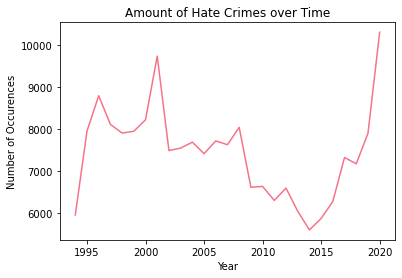

In [9]:
# plot number of crimes that occurred in each year
y=hate_crimes['DATA_YEAR'].value_counts()
x=hate_crimes['DATA_YEAR'].value_counts().index
sb.lineplot( x=x, y=y,color=colors[0])
plt.title("Amount of Hate Crimes over Time")
plt.xlabel("Year")
plt.ylabel("Number of Occurences")
plt.show()


We can see that from around 1996 hate crimes have had a generally decreasing trend up until 2014. After that, hate crimes sharply increased and skyrocketed in 2020.

### **Looking at the types of offenses**

Now, we are exploring the data based on the type of offense. Let's figure out what types of hate crimes occur the most in the U.S. To do that, first, let's figure out the different types of offenses we are dealing with in our dataset.

In [10]:
# getting different types of offenses
hate_crimes.OFFENSE_NAME.unique()

array(['Intimidation', 'Destruction/Damage/Vandalism of Property',
       'Simple Assault', 'Aggravated Assault',
       'Murder and Nonnegligent Manslaughter', 'Arson', 'Robbery',
       'Burglary/Breaking & Entering', 'Not Specified', 'Rape',
       'Motor Vehicle Theft', 'Weapon Law Violations',
       'Theft of Motor Vehicle Parts or Accessories',
       'Kidnapping/Abduction', 'All Other Larceny', 'Theft From Building',
       'Shoplifting', 'Theft From Motor Vehicle', 'Fondling',
       'Pornography/Obscene Material', 'Embezzlement',
       'Drug/Narcotic Violations', 'Purse-snatching',
       'Drug Equipment Violations',
       'Credit Card/Automated Teller Machine Fraud',
       'Sexual Assault With An Object', 'Counterfeiting/Forgery',
       'False Pretenses/Swindle/Confidence Game', 'Pocket-picking',
       'Welfare Fraud', 'Extortion/Blackmail', 'Stolen Property Offenses',
       'Incest', 'Sodomy', 'Negligent Manslaughter', 'Statutory Rape',
       'Theft From Coin-Operate

After that, let's figure out what types of hate crimes are occuring the U.S. the most. As a result, follow the code below to count the occurrence of each event type in the entire dataset and put it inside the data frame as a new column.

In [11]:
# add a new column with the total number of same offenses (# of intimidation, assault, etc.) respective to the offense 
# type
offense = hate_crimes.groupby('OFFENSE_NAME').first()
offense['COUNT'] = hate_crimes['OFFENSE_NAME'].value_counts()
offense.reset_index(inplace=True)
offense = offense[['OFFENSE_NAME','COUNT']]

# print the counts of each offense type
offense

OFFENSE_NAME  COUNT
0                            Aggravated Assault  21985
1                             All Other Larceny   2168
2                                Animal Cruelty      8
3                                         Arson   1298
4           Assisting or Promoting Prostitution      6
5                              Betting/Wagering      1
6                                       Bribery      2
7                  Burglary/Breaking & Entering   3510
8                        Counterfeiting/Forgery    201
9    Credit Card/Automated Teller Machine Fraud    154
10     Destruction/Damage/Vandalism of Property  64198
11                    Drug Equipment Violations    363
12                     Drug/Narcotic Violations   1023
13                                 Embezzlement     53
14                          Extortion/Blackmail     49
15      False Pretenses/Swindle/Confidence Game    290
16                                     Fondling    187
17                    Hacking/Computer Invasion      7
18       Human Trafficking, Commercial Sex Acts      3
19                               Identity Theft     38
20                                Impersonation    128
21                                       Incest      8
22                                 Intimidation  58847
23                         Kidnapping/Abduction    109
24                          Motor Vehicle Theft    457
25         Murder and Nonnegligent Manslaughter    241
26                       Negligent Manslaughter      6
27                                Not Specified    689
28                               Pocket-picking     24
29                 Pornography/Obscene Material     58
30                                 Prostitution     14
31                      Purchasing Prostitution      2
32                              Purse-snatching     24
33                                         Rape    242
34                                      Robbery   3422
35                Sexual Assault With An Object     43
36                                  Shoplifting    615
37                               Simple Assault  38316
38                                       Sodomy     57
39                               Statutory Rape     17
40                     Stolen Property Offenses    105
41                          Theft From Building    506
42   Theft From Coin-Operated Machine or Device     12
43                     Theft From Motor Vehicle    673
44  Theft of Motor Vehicle Parts or Accessories    181
45                        Weapon Law Violations    347
46                                Welfare Fraud      6
47                                   Wire Fraud     20

**Let's go ahead and graph the number of occurrences for each offense type.**

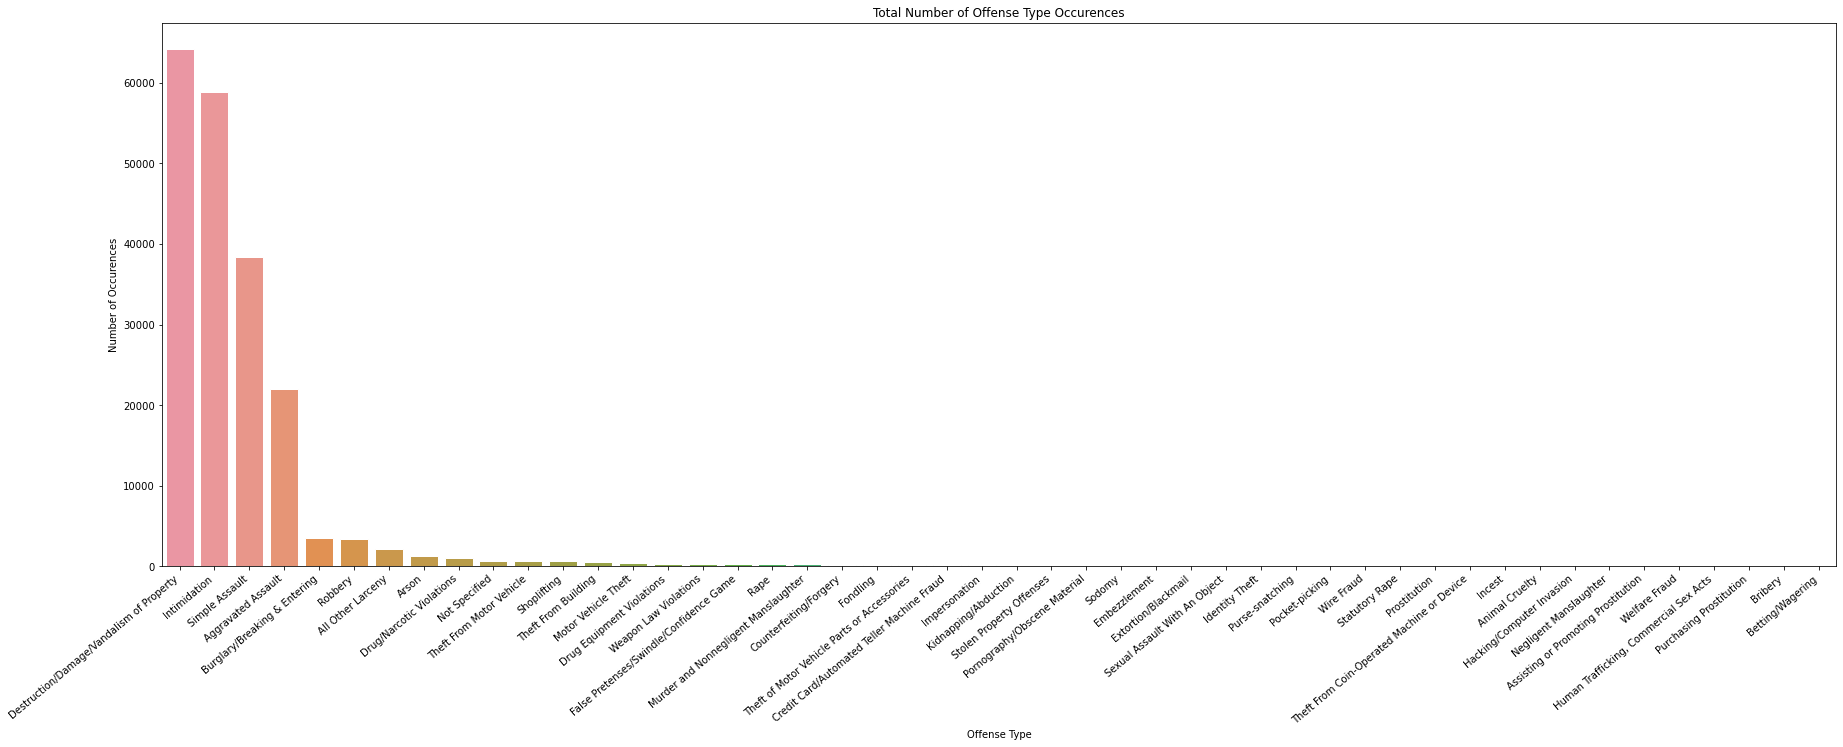

In [12]:
plt.figure(figsize = (30, 10))
plt.title('Total Number of Offense Type Occurences')
sb.set(font_scale=1.2)
count_bar = sb.countplot(x = 'OFFENSE_NAME', data = hate_crimes,\
                          order = hate_crimes['OFFENSE_NAME'].value_counts().index)
count_bar.set_xticklabels(count_bar.get_xticklabels(), rotation=40, ha="right");
count_bar.set(xlabel='Offense Type', ylabel='Number of Occurences');

As you may see, we have some events such as Destruction/Damage/Vandalism that had more than 60k occurrences whereas Bribery had almost no occurrences comparatively. As a result, to make the progress easier, let's take a look at the TOP 8 offense types that occurred, and rename the rest of the event types to Other, by running the following code.

In [13]:
def label_event_type (row):
   event = row['OFFENSE_NAME']
   if event in ['Destruction/Damage/Vandalism of Property', 'Intimidation', 'Simple Assault', 'Aggravated Assault', \
                'Robbery', 'Burglary/Breaking & Entering', 'All Other Larceny', 'Arson']:
      return event
   return 'Other'

**Now let's try to visualize it again, this time, using another graph named pie plot.**

**A pie plot helps us to see each event type portion in comparison to the other event types.**

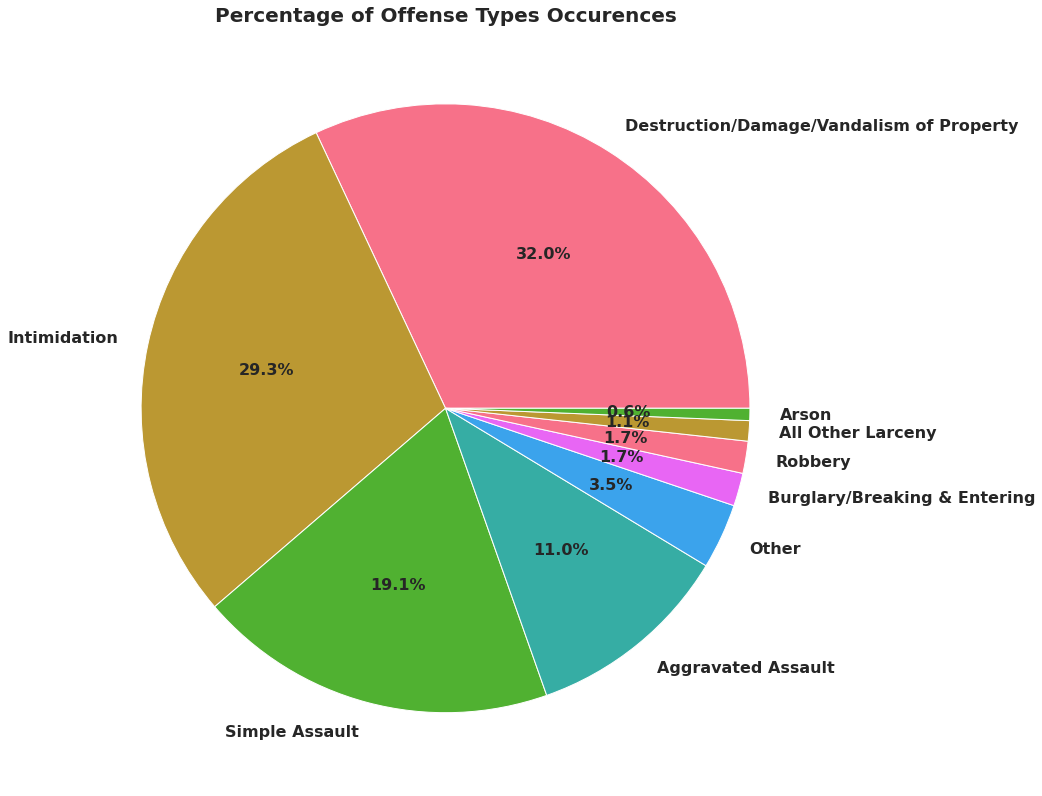

In [14]:
hate_crimes['OFFENSE_NAME_MODIFIED'] = hate_crimes.apply (lambda row: label_event_type(row), axis=1)

x = hate_crimes['OFFENSE_NAME_MODIFIED'].value_counts()
y = hate_crimes['OFFENSE_NAME_MODIFIED'].value_counts().index

plt.figure(figsize = (14, 14))
plt.pie(x,labels=y,autopct= '%.1f%%',textprops={'fontsize': 16, 'fontweight': "600"},colors=colors[0:6])
plt.title("Percentage of Offense Types Occurences",fontsize=20,fontweight= "600")
plt.show()

**So as we can easily understand, that Destruction/Damage/Vandalism and Intimidation has the biggest portion in the entire pie plot followed by Simple Assault and Aggravated Assault.**

### **Looking at the types of biases**

Here we are exploring the data based the classification of biases. We will first look at which types of bias happen the most.

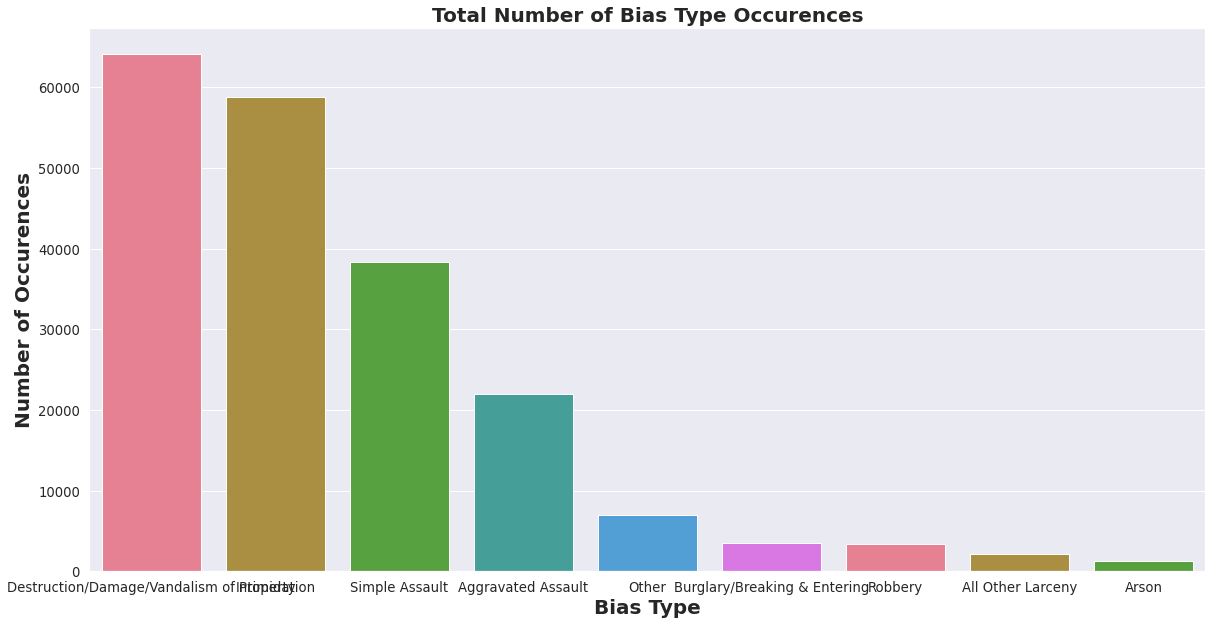

In [15]:
plt.figure(figsize = (20, 10))
plt.title("Total Number of Bias Type Occurences",fontsize=20,fontweight= "600")
sb.set()
count_bar = sb.barplot(x = y,y=x,palette= colors[0:6])
plt.xlabel("Bias Type",fontsize=20,fontweight= "600")
plt.ylabel("Number of Occurences",fontsize=20,fontweight= "600")
plt.show()

**Now let's try to visualize it again, this time, using another graph named pie plot.**

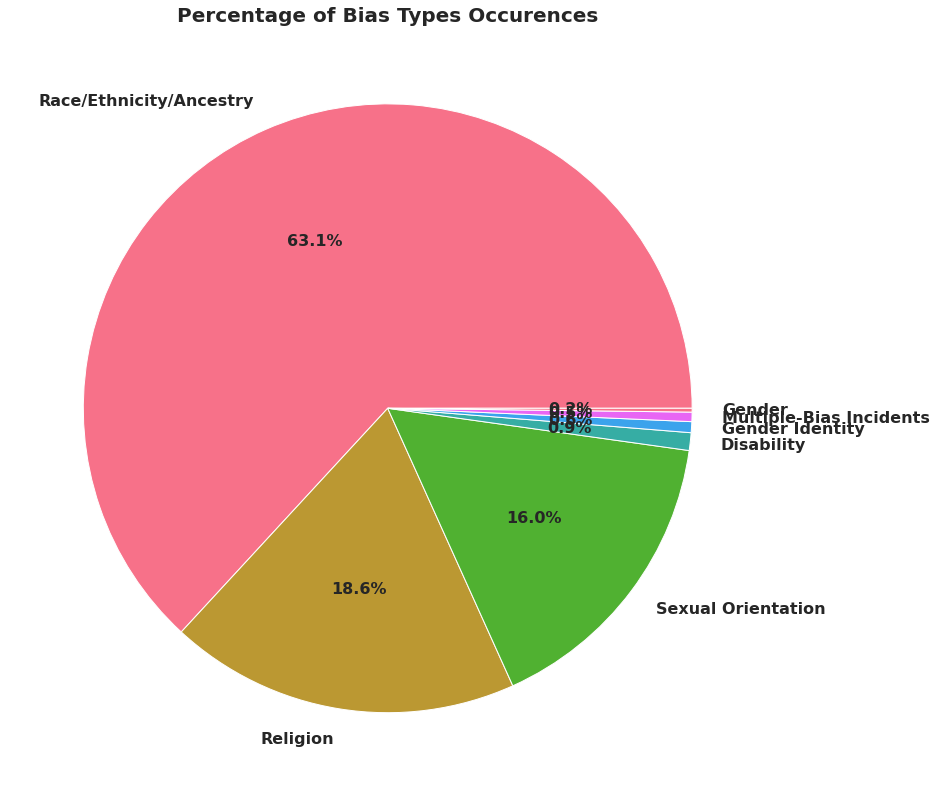

In [16]:
x = hate_crimes['BIAS_CATEGORY'].value_counts()
y = hate_crimes['BIAS_CATEGORY'].value_counts().index

plt.figure(figsize = (14, 14))
plt.pie(x,labels=y,autopct= '%.1f%%',textprops={'fontsize': 16, 'fontweight': "600"},colors=colors[0:6])
plt.title("Percentage of Bias Types Occurences",fontsize=20,fontweight= "600")
plt.show()

**So as we can easily understand, that Race/Ethnicity/Ancestry take up the biggest portion in the entire pie plot followed by Religion and Sexual Orientation.**

Now, let's find out if there is a specific trend in the number of each type of hate crime based on bias over the years.

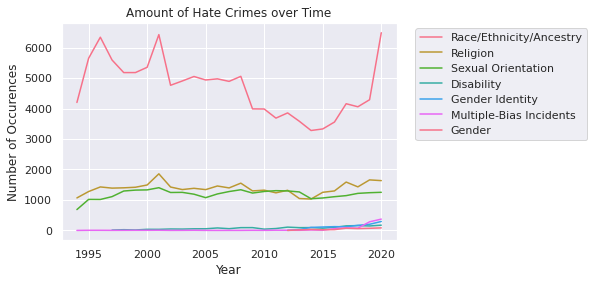

In [17]:
overall_bias = hate_crimes.groupby(['BIAS_CATEGORY'])
sb.set_palette(colors)
keys = ['Race/Ethnicity/Ancestry','Religion','Sexual Orientation','Disability','Gender Identity','Multiple-Bias Incidents','Gender']
for key in keys:
    years = overall_bias.get_group(key)['DATA_YEAR'].value_counts().index
    amount = overall_bias.get_group(key)['DATA_YEAR'].value_counts()
    sb.lineplot(years,amount,label=key)
plt.title("Amount of Hate Crimes over Time")
plt.xlabel("Year")
plt.ylabel("Number of Occurences")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

As we can see, there is no specific pattern over the years for the number hate crimes for each group, but in general, the number of cases seem to stay constant except for Race/Ethnicity/Ancestry which tends to fluctuate.

### **Let's take a closer look at the Race/Ethnicity/Ancestry Bias**

We can further categorize this bias by each individual race/ethnicity like Black or African American, Asian, Hispanic or Latino.

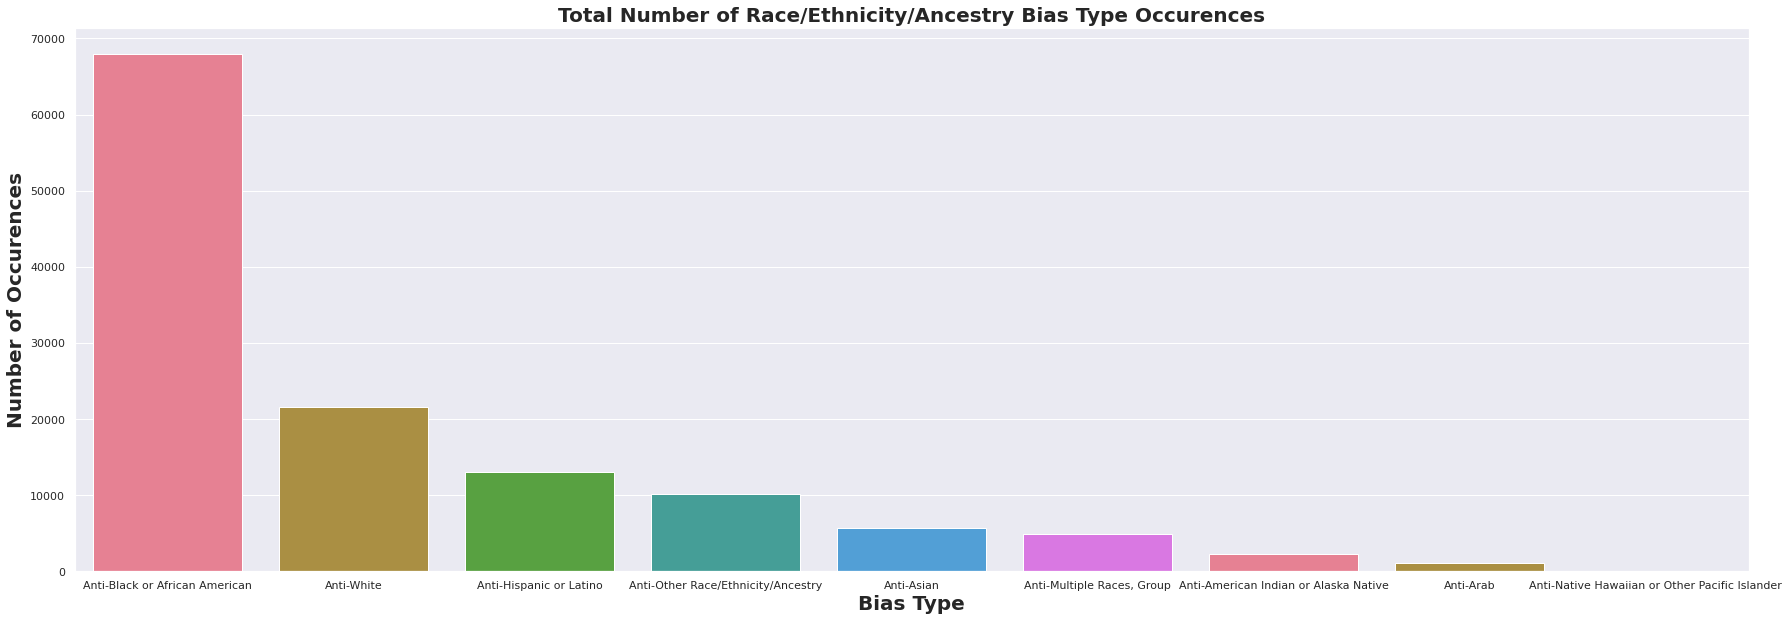

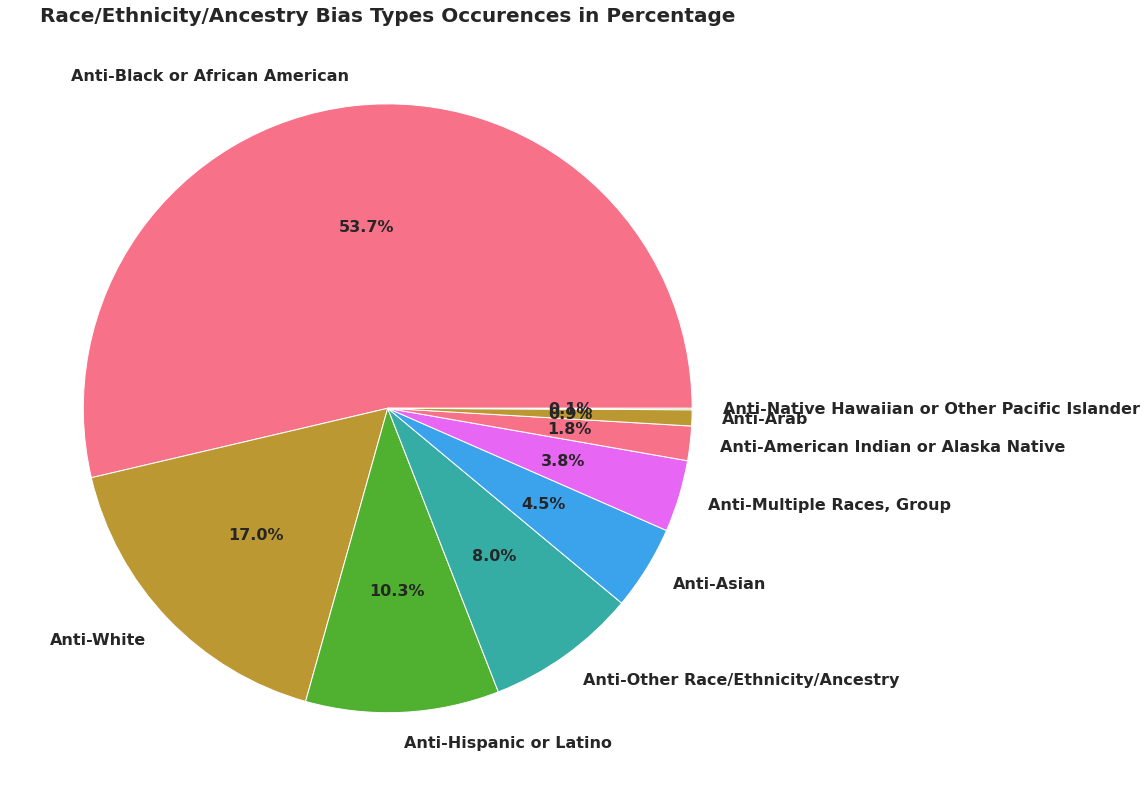

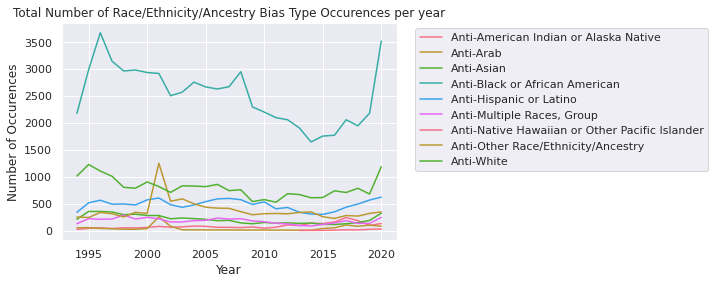

In [18]:
race_ethnicity_ancestry= hate_crimes.groupby('BIAS_CATEGORY').get_group('Race/Ethnicity/Ancestry')
x = race_ethnicity_ancestry['BIAS_DESC'].value_counts()
y = race_ethnicity_ancestry['BIAS_DESC'].value_counts().index
size = race_ethnicity_ancestry['BIAS_DESC'].value_counts().size

# bar graph
plt.figure(figsize = (30, 10))
plt.title("Total Number of Race/Ethnicity/Ancestry Bias Type Occurences",fontsize=20,fontweight= "600")
sb.set()
count_bar = sb.barplot(x = y,y=x,palette= colors)
plt.xlabel("Bias Type",fontsize=20,fontweight= "600")
plt.ylabel("Number of Occurences",fontsize=20,fontweight= "600")
plt.show()

# pie chart
plt.figure(figsize = (14, 14))
plt.pie(x,labels=y,autopct= '%.1f%%',textprops={'fontsize': 16, 'fontweight': "600"},colors=colors)
plt.title("Race/Ethnicity/Ancestry Bias Types Occurences in Percentage",fontsize=20,fontweight= "600")
plt.show()

# line graph
grouped = race_ethnicity_ancestry.groupby(['BIAS_DESC'])
i = 0
sb.set_palette(colors)
for key in grouped.groups.keys():
    years = grouped.get_group(key)['DATA_YEAR'].value_counts().index
    amount = grouped.get_group(key)['DATA_YEAR'].value_counts()
    sb.lineplot(years,amount,label=key)

plt.xlabel("Year")
plt.ylabel("Number of Occurences")
plt.title("Total Number of Race/Ethnicity/Ancestry Bias Type Occurences per year")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


**From the pie chart, we can see the the number of Anti-Black or African American hate crimes make up more than 50% of hate crimes committed by Race/Ethnicity/Ancestry. There are no clear trends in any racial group over the years, however many groups experience an increase in the year 2020.**

Because the Anti-Black or African American group is drastically higher than the other lines, the rest of the lines are squashed near the bottom. To get a closer look at all of the lines, we made a separate line graph for each of the racial groups.

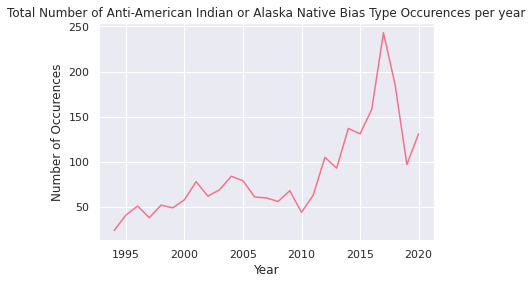

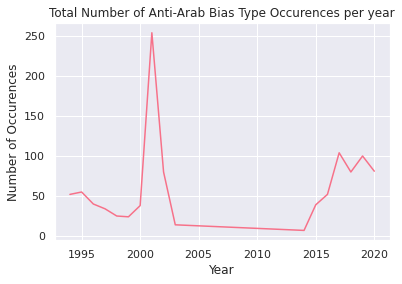

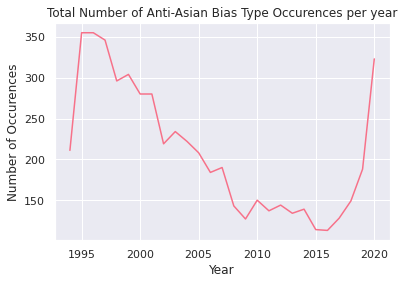

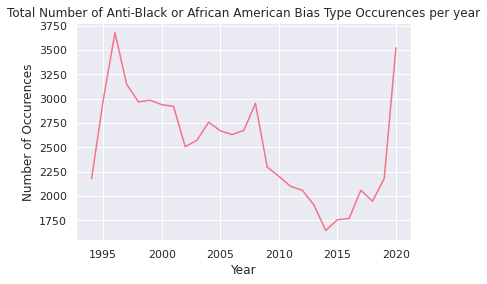

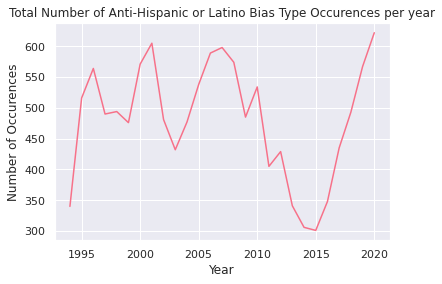

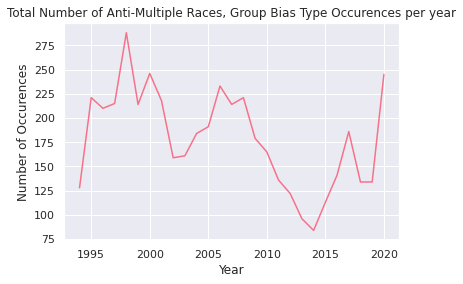

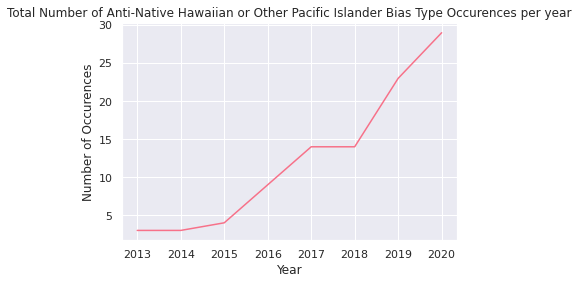

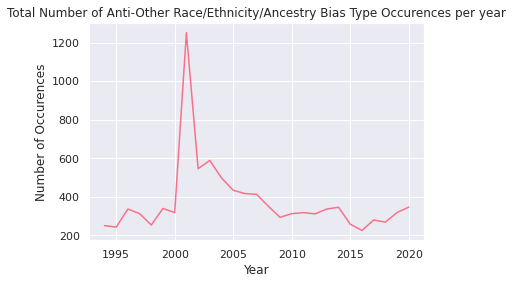

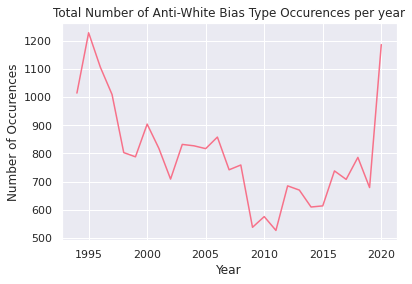

In [19]:
grouped = race_ethnicity_ancestry.groupby(['BIAS_DESC'])
sb.set_palette(colors)
for key in grouped.groups.keys():
    years = grouped.get_group(key)['DATA_YEAR'].value_counts().index
    amount = grouped.get_group(key)['DATA_YEAR'].value_counts()
    sb.lineplot(years,amount)
    plt.xlabel("Year")
    plt.ylabel("Number of Occurences")
    plt.title("Total Number of "+key+" Bias Type Occurences per year")
    plt.show()
    



**We can observe that Anti-Asian, Anti-Black, Anti-Hispanic, and Anti-White biased hate crimes increased drastically from around 2015 to 2020.**
Anti-asian bias has increased alot from 2018-2020 due to to covid.


### **Taking a closer look at hate crimes against religious groups**

Hate crimes tartetting specific religious groups made up 18.6% of all hate crimes. Let's take a closer look at which religious groups face the most hate in the U.S.

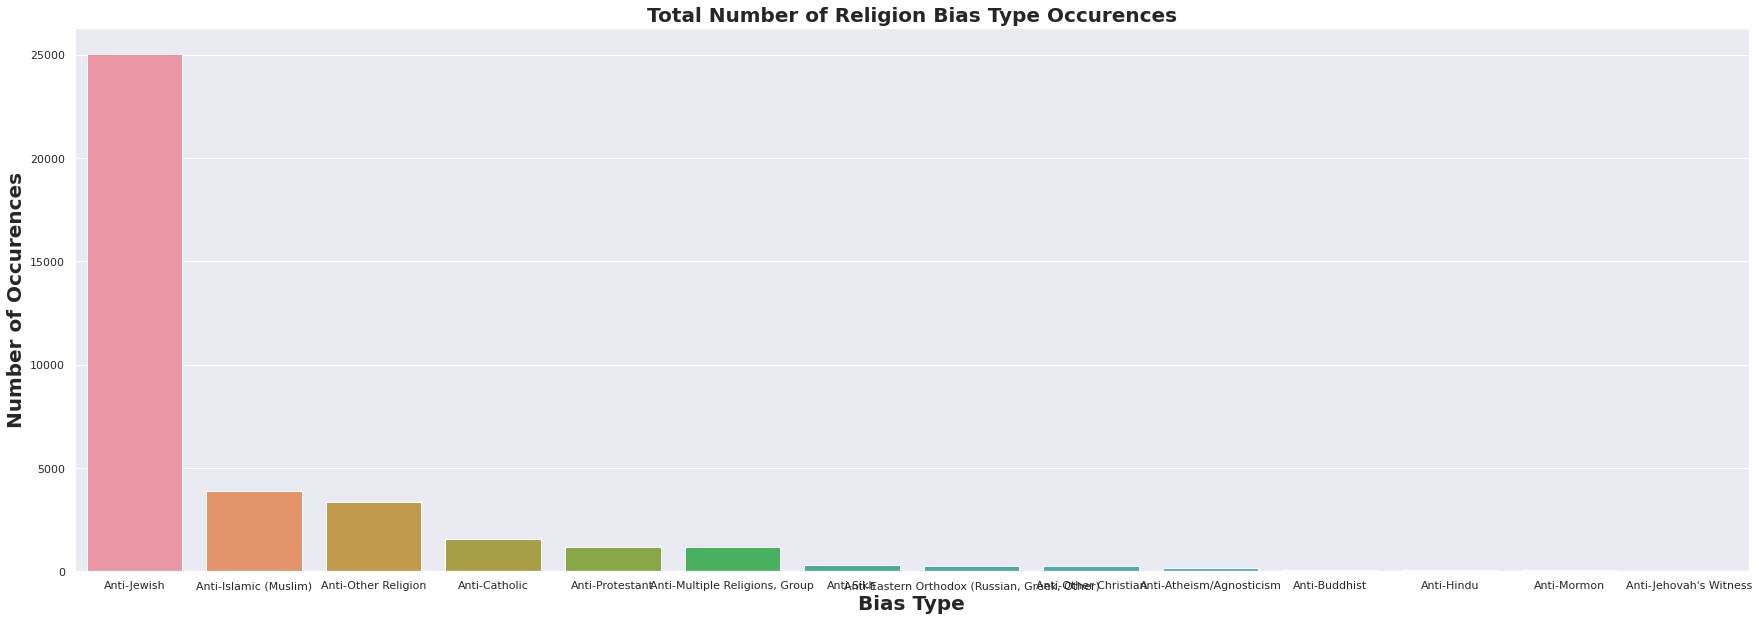

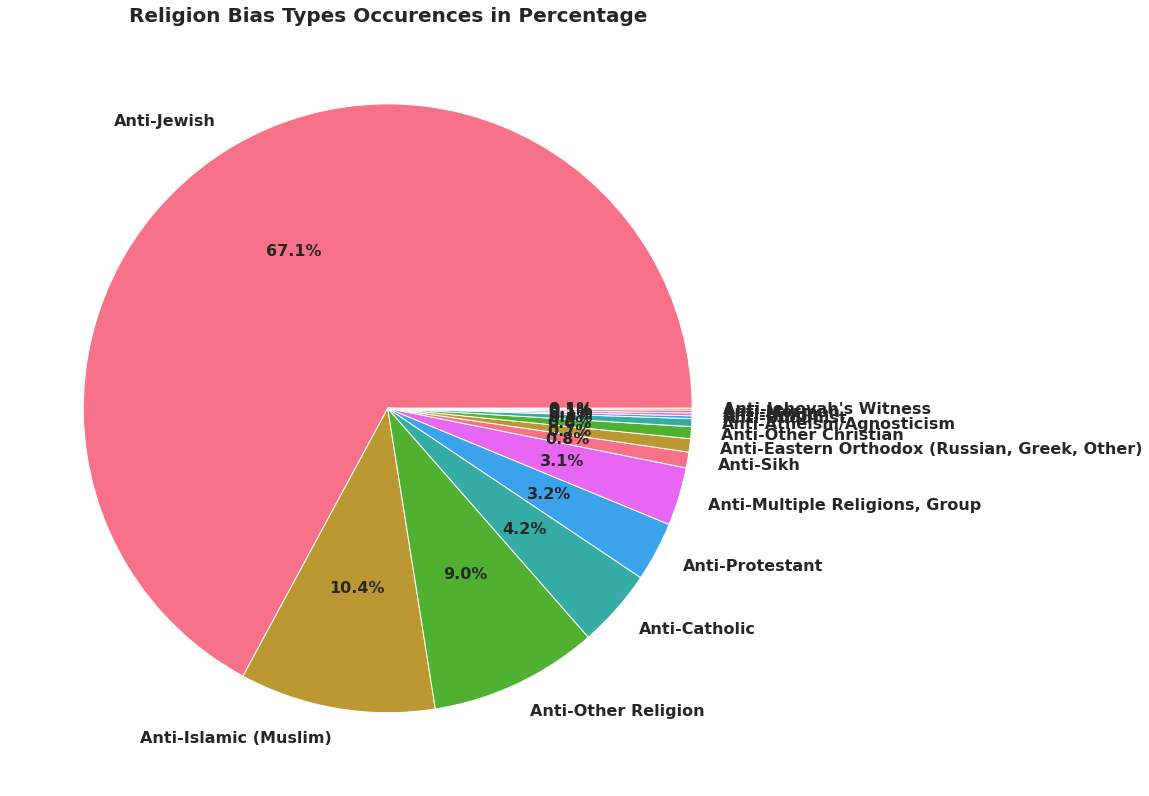

In [20]:
religion= hate_crimes.groupby('BIAS_CATEGORY').get_group('Religion')
x = religion['BIAS_DESC'].value_counts()
y = religion['BIAS_DESC'].value_counts().index

# bar graph
plt.figure(figsize = (30, 10))
plt.title("Total Number of Religion Bias Type Occurences",fontsize=20,fontweight= "600")
sb.set_palette('husl')

count_bar = sb.barplot(x = y,y=x)
plt.xlabel("Bias Type",fontsize=20,fontweight= "600")
plt.ylabel("Number of Occurences",fontsize=20,fontweight= "600")
plt.show()

# pie chart
plt.figure(figsize = (14, 14))
plt.pie(x,labels=y,autopct= '%.1f%%',textprops={'fontsize': 16, 'fontweight': "600"},colors=colors)
plt.title("Religion Bias Types Occurences in Percentage",fontsize=20,fontweight= "600")
plt.show()



**We can see that Anti-Jewish hate crimes make up the majority of hate crimes targeted at religious groups.**

### **Taking a closer look at hate crimes against different sexual orientation groups**

The LGBTQ movement has really gained traction in recent years, however it has also dealt with a lot of opposition and backlash. Hate crimes against these groups have also risen as a result of this.

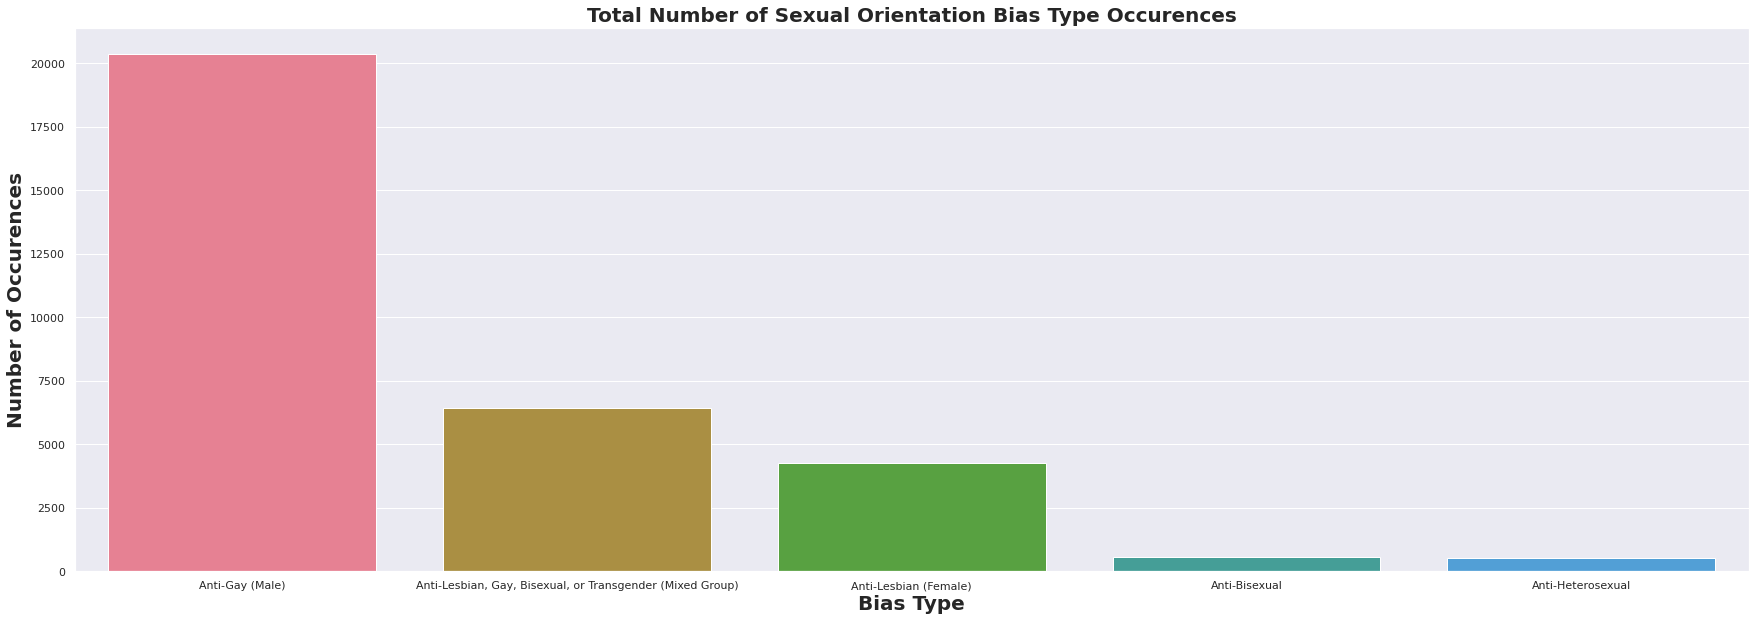

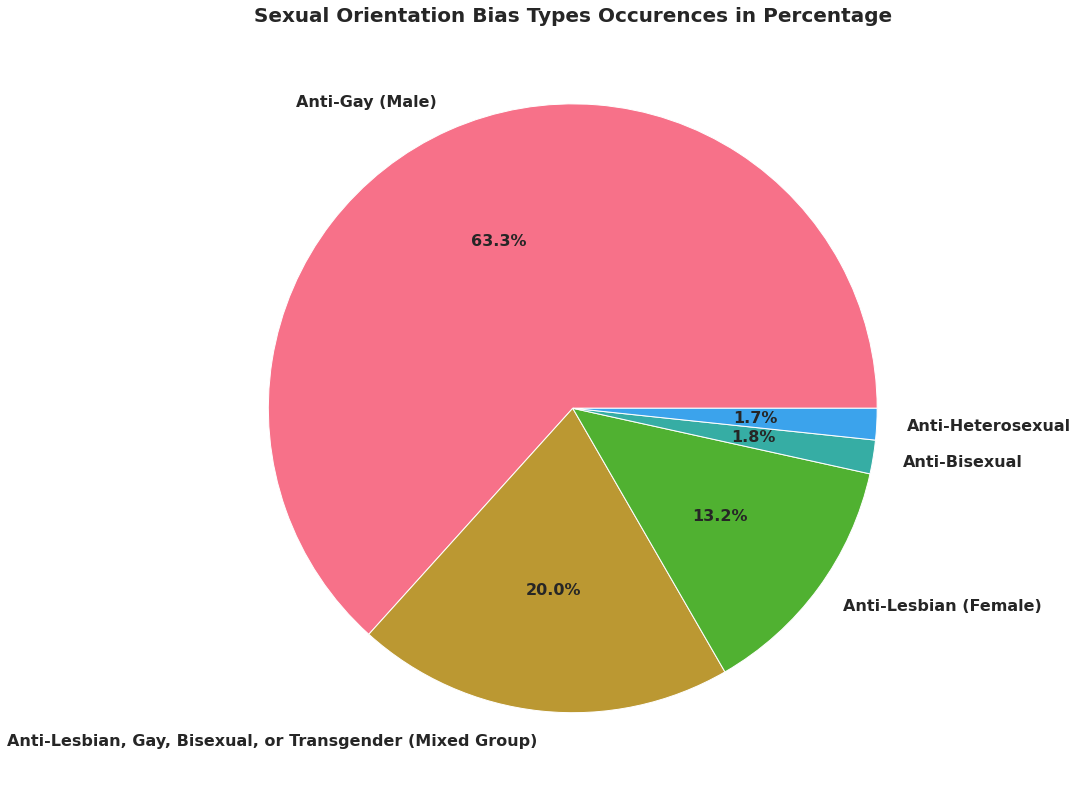

In [21]:
sexual_orientation= hate_crimes.groupby('BIAS_CATEGORY').get_group('Sexual Orientation')
x = sexual_orientation['BIAS_DESC'].value_counts()
y = sexual_orientation['BIAS_DESC'].value_counts().index

# bar graph
plt.figure(figsize = (30, 10))
plt.title("Total Number of Sexual Orientation Bias Type Occurences",fontsize=20,fontweight= "600")
sb.set_palette('husl')

count_bar = sb.barplot(x = y,y=x)
plt.xlabel("Bias Type",fontsize=20,fontweight= "600")
plt.ylabel("Number of Occurences",fontsize=20,fontweight= "600")
plt.show()

# pie chart
plt.figure(figsize = (14, 14))
plt.pie(x,labels=y,autopct= '%.1f%%',textprops={'fontsize': 16, 'fontweight': "600"},colors=colors)
plt.title("Sexual Orientation Bias Types Occurences in Percentage",fontsize=20,fontweight= "600")
plt.show()



We can see that Anti-Gay hate crimes make up almost 2/3 of all hate crimes against sexual orientation.

**Since we are analyzing the hate crimes in the United States, let's find out which groups are the most targeted in each state.**

In order to do so, we are going to analyze hate crimes against particular groups in each state. However, to feed the data for visualization, we need to sum up the numbers based on each state. That is why we are going to use an amazing tool named groupby which helps us to converge the numbers based on each state and targeted group. We are doing to make a new data frame for this purpose. We are going to use this data frame for the next few steps.

In [22]:
states=hate_crimes.groupby(['STATE_ABBR', 'BIAS_DESC']).size().reset_index(name='Frequency')
states

STATE_ABBR                                       BIAS_DESC  Frequency
0            AK           Anti-American Indian or Alaska Native         48
1            AK                                       Anti-Arab          1
2            AK                                      Anti-Asian          7
3            AK                  Anti-Black or African American         75
4            AK                                   Anti-Catholic          1
...         ...                                             ...        ...
1946         WY  Anti-Native Hawaiian or Other Pacific Islander          1
1947         WY              Anti-Other Race/Ethnicity/Ancestry          4
1948         WY                             Anti-Other Religion          4
1949         WY                                 Anti-Protestant          3
1950         WY                                      Anti-White         12

[1951 rows x 3 columns]

Now that we have the number of hate crimes against each group in each state, we only want to focus on the group with the most hate crimes by state, so we need to filter out all the other rows.

In [23]:
idx = states.groupby(['STATE_ABBR'])['Frequency'].transform(max) == states['Frequency']
bias_by_state = states[idx]
bias_by_state

STATE_ABBR                       BIAS_DESC  Frequency
3            AK  Anti-Black or African American         75
23           AL  Anti-Black or African American        101
45           AR  Anti-Black or African American        352
76           AZ  Anti-Black or African American       2123
138          CA  Anti-Black or African American      11221
194          CO  Anti-Black or African American       1140
235          CT  Anti-Black or African American       1236
269          DC                 Anti-Gay (Male)        597
291          DE  Anti-Black or African American        378
316          FL  Anti-Black or African American       1575
345          FS  Anti-Black or African American        148
384          GA  Anti-Black or African American        426
412          GM                      Anti-Asian          2
428          HI                      Anti-White         39
432          IA  Anti-Black or African American        365
454          ID  Anti-Black or African American        267
482          IL  Anti-Black or African American       1746
515          IN  Anti-Black or African American        843
554          KS  Anti-Black or African American        756
587          KY  Anti-Black or African American       1225
641          LA  Anti-Black or African American        181
681          MA  Anti-Black or African American       3131
754          MD  Anti-Black or African American       2177
782          ME  Anti-Black or African American        480
811          MI  Anti-Black or African American       4517
850          MN  Anti-Black or African American       1798
888          MO  Anti-Black or African American       1392
939          MS        Anti-Physical Disability         52
971          MT                      Anti-White        139
977          NB  Anti-Black or African American        374
1003         NC  Anti-Black or African American       1218
1042         ND  Anti-Black or African American        102
1065         NH  Anti-Black or African American        210
1120         NJ  Anti-Black or African American       6739
1276         NM  Anti-Black or African American        146
1307         NV  Anti-Black or African American        583
1357         NY                     Anti-Jewish       6729
1379         OH  Anti-Black or African American       3102
1428         OK  Anti-Black or African American        563
1463         OR  Anti-Black or African American       1093
1507         PA  Anti-Black or African American       1361
1536         RI  Anti-Black or African American        205
1561         SC  Anti-Black or African American        772
1615         SD                      Anti-White        133
1625         TN  Anti-Black or African American       1442
1667         TX  Anti-Black or African American       2683
1743         UT                      Anti-White        320
1750         VA  Anti-Black or African American       2014
1782         VT  Anti-Black or African American        167
1815         WA  Anti-Black or African American       2353
1871         WI  Anti-Black or African American        424
1932         WV                      Anti-White        341
1935         WY  Anti-Black or African American         60

With this data, we can plot the most targeted group in each state on a map to better visualize the data. Luckily there are libraries to help us do this. We will be implementing the Plotly library and using the choropleth method. Every state's most targeted group is color coded as based on it. The documentation for making maps like this in plotly can be found [here](https://plotly.com/python/choropleth-maps/).

In [24]:
fig = px.choropleth(bias_by_state, color="BIAS_DESC", locations="STATE_ABBR", locationmode = 'USA-states', \
                    scope="usa", featureidkey="feature.properties.name", \
                    title="Most Common Bias Group for each State")
fig.show()

**elections and hate crimes**
There has been many articles about the more hate crimes during when Trump was elected President and during his term. So we wanted to look at the amount of hate crimes before and during his presidency. We looked at the previous term and Trump's term to look at the amount

In [25]:
#grouping the hate crimes by year and state to get the frequency of each state in that year
df=hate_crimes.groupby(['DATA_YEAR', 'STATE_ABBR']).size().reset_index(name='Frequency')
df = df[df['DATA_YEAR']>=2012]
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

DATA_YEAR STATE_ABBR  Frequency
0         2012         AK          6
1         2012         AL          6
2         2012         AR         51
3         2012         AZ        176
4         2012         CA        910
..         ...        ...        ...
449       2020         VT         77
450       2020         WA        451
451       2020         WI        157
452       2020         WV         82
453       2020         WY         18

[454 rows x 3 columns]

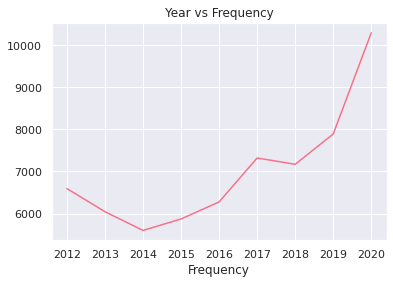

In [26]:
election = hate_crimes.groupby(['DATA_YEAR']).size().reset_index(name='Frequency')
election = election[election['DATA_YEAR']>=2012]
plt.title('Year vs Frequency')
plt.plot(election['DATA_YEAR'],election['Frequency'])
plt.xlabel('Year')
plt.xlabel('Frequency')

plt.show()

In [27]:
#creating a slider for the amount of hate crimes in each states over the years of 2012-2020
year = 2012

scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']]

data_slider = []
for year in df['DATA_YEAR'].unique():
    df_segmented =  df[(df['DATA_YEAR']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['STATE_ABBR'],
                        z=df_segmented['Frequency'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        colorbar= {'title':'# Hate Crimes'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2012))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Hate Crimes by State Since 2012', geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
plotly.offline.iplot(fig)

## Data Analysis & Hypothesis Testing
**What is data analysis and hypothesis testing?**
Data analysis is way of examing data to draw conclusions.
Hypothesis testing is a formal way to investigate data using statistics.

**We are going to look at linear regression and how to use them.**
First we will use a simple hypothesis to test. The higher the population in the state, the higher the hate crimes the state has. In hypothesis testing there is a null hypothesis and alternate hypothesis. The null hypothesis predicts of no relationship between the variables. While the alternate hypothesis predicts a relationship. In this case the null hypothesis is there is no relationship between population and hate crimes. In the example, we will only look at 2019 data.

In [28]:
#collecting and cleaning the population data then merging
population = pd.read_csv('population.csv')
population=population.drop([0,1,2,3,4,5,6,7]).reset_index()
population.columns = ['old index','states','2010census','2010estimate','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
data= hate_crimes.groupby('DATA_YEAR').get_group(2019)
data_states=data['STATE_NAME'].value_counts().sort_index()
data_states = pd.DataFrame(data_states)
data_states=data_states.drop('Federal')
data_states=data_states.reset_index()
data_states.columns = ['state','amount_of_hate_crimes']
data_states= data_states.assign(population=population['2019'])
data_states['population'] = data_states['population'].replace({',':''}, regex = True)
data_states['population'] = data_states['population'].astype(int)
data_states_2019=data_states
data_states_2019.head()

state  amount_of_hate_crimes  population
0     Alabama                      1     4903185
1      Alaska                     11      731545
2     Arizona                    209     7278717
3    Arkansas                     14     3017804
4  California                   1015    39512223

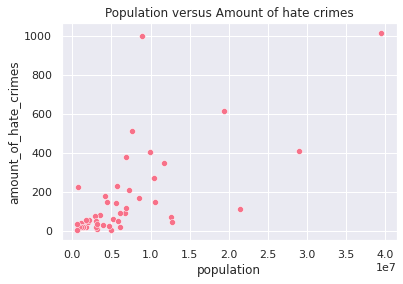

In [29]:
sb.scatterplot(data=data_states_2019,x='population',y='amount_of_hate_crimes')
plt.title('Population versus Amount of hate crimes')
plt.show()


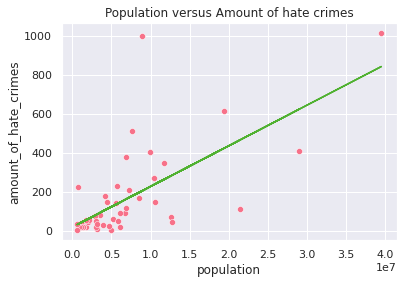

In [30]:
x= data_states_2019['population'].to_numpy().reshape((-1, 1))
x1=data_states_2019['population']
y= data_states_2019['amount_of_hate_crimes']
model = LinearRegression().fit(x,y)
#creating a linear regression
slope, intercept, r, p, std_err = stats.linregress(x1, y)
def linreg(x):
  return slope * x + intercept


line = list(map(linreg, x1))
sb.scatterplot(data=data_states_2019,x='population',y='amount_of_hate_crimes')
plt.plot(x, line,color=colors[2])
plt.title('Population versus Amount of hate crimes')
plt.show()


**a different idea**
We will now look how income at each state affects the amount of hate crimes. The inspiration for this idea was this article [
Higher Rates Of Hate Crimes Are Tied To Income Inequality](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/) from website called **FiveThirtyEigtht** that uses data to advance public knowledge. This is a good site to learn more about insight and policy in data science. The **FiveThirtyEigtht** article used data from the fbi which we are currently using but also data from a self-reported hate incidents when the Trump election was happening before and after. The article did multiple linear regression to see why there is an increase in hate crimes. The found income inqeuality to be significant. Income inqeulity is known determinant for crimes in general so we thought it would be intersting to see the test the hypothesis.

In [31]:

#inputting the income data
income= pd.read_csv('raw_data.csv')
income= income.drop([0,52]).reset_index()
data_states_2019 =data_states_2019.assign(median_household_income=income['Median Annual Household Income'])
data_states_2019['median_household_income'] = data_states_2019['median_household_income'].replace({'\$':''}, regex = True)
data_states_2019['median_household_income'] = data_states_2019['median_household_income'].astype(int)
data_states_2019['hate_crimes_by_population']=data_states_2019['amount_of_hate_crimes']/data_states['population']
data_states_2019.head()

state  amount_of_hate_crimes  population  median_household_income  \
0     Alabama                      1     4903185                    51734   
1      Alaska                     11      731545                    75463   
2     Arizona                    209     7278717                    62055   
3    Arkansas                     14     3017804                    48952   
4  California                   1015    39512223                    80440   

   hate_crimes_by_population  
0               2.039491e-07  
1               1.503667e-05  
2               2.871385e-05  
3               4.639135e-06  
4               2.568825e-05

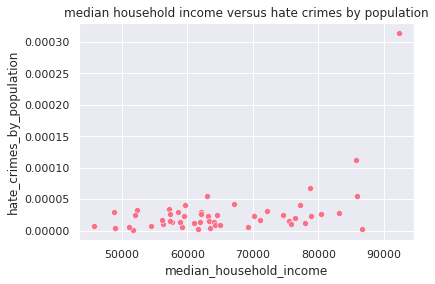

In [32]:
plt.title('median household income versus hate crimes by population')

sb.scatterplot(data=data_states_2019,x='median_household_income',y='hate_crimes_by_population')
plt.show()

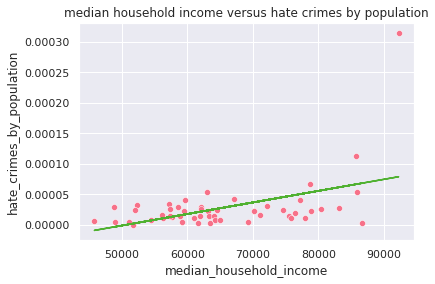

In [33]:
x= data_states_2019['median_household_income'].to_numpy().reshape((-1, 1))
y= data_states_2019['hate_crimes_by_population']
model = LinearRegression().fit(x,y)
x1=data_states_2019['median_household_income']
slope, intercept, r, p, std_err = stats.linregress(x1, y)
def linreg(x):
  return slope * x + intercept


line = list(map(linreg, x1))
sb.scatterplot(data=data_states_2019,x='median_household_income',y='hate_crimes_by_population')
plt.plot(x, line,color=colors[2])
plt.title('median household income versus hate crimes by population')

plt.show()


Overall knowledge to be taken from the tutorial is while there is steps to the data science pipeline, data science pipeline can also be cycle like our we included income and population data later on as well learned more about the data

## Insight & Policy 

**Insight**
With the hypothesis testing the was not enough correlation to reject the null hypothesis so we were not able to find any insight there. The general exploration showed there has been uptick in hate crimes the last couple years. One example is anti-asian hate crimes. Biden has recently signed [COVID-19 Hate Crimes Act](https://abcnews.go.com/Politics/biden-sign-anti-asian-hate-crime-bill-law/story?id=77801857) that tries to curb discriminatory language used to describe COVID pandemic. It would have been intersting to see there correlation between amount of COVID cases in USA and amount of hate crimes but the data was too limited due to only the year being reported.

